In [5]:
!pip3 install scikit-plot
!pip3 install xgboost
!pip3 install category_encoders
!pip3 install imblearn
!pip3 install catboost

^C


# DataSet: https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

In [194]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import scikitplot as skplt
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from category_encoders import TargetEncoder
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import linear_model
from scipy.stats import zscore
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from scipy.stats import kurtosis
from datetime import date
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.calibration import calibration_curve
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from scipy.cluster.vq import kmeans, vq
from datetime import datetime
from sklearn.decomposition import PCA
import xgboost as xgb
from catboost import CatBoostClassifier
from scipy.stats import chi2_contingency

# to read the file from the computer

In [195]:
df=pd.read_csv('C://Users//Guest123//Desktop//NEU_Sem2_S23//INFO_6105_33201_DSEM//DSC_Assignment//german.data',sep=" ",header=None)
print(df)

      0   1    2    3     4    5    6   7    8     9   ...    11  12    13  \
0    A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1    A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2    A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3    A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4    A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   
..   ...  ..  ...  ...   ...  ...  ...  ..  ...   ...  ...   ...  ..   ...   
995  A14  12  A32  A42  1736  A61  A74   3  A92  A101  ...  A121  31  A143   
996  A11  30  A32  A41  3857  A61  A73   4  A91  A101  ...  A122  40  A143   
997  A14  12  A32  A43   804  A61  A75   4  A93  A101  ...  A123  38  A143   
998  A11  45  A32  A43  1845  A61  A73   4  A93  A101  ...  A124  23  A143   
999  A12  45  A34  A41  4576  A62  A71   3  A93  A101  ...  A123  27  A143   

       14 15    16 17    18    19 20  
0    A152  2  A173  1  A

# to read the file directly from the website

In [196]:
#df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', delimiter=' ',header=None)
#urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc', 'german.doc')
#f = open('german.doc')
#german_doc= f.read()
#df.columns=['account_bal','duration','payment_status','purpose','credit_amount','savings_bond_value','employed_since','intallment_rate','sex_marital','guarantor','residence_since','most_valuable_asset','age','concurrent_credits','type_of_housing','number_of_existcr','job','number_of_dependents','telephon','foreign','target']
#df= german_df.replace(['A11','A12','A13','A14', 'A171','A172','A173','A174','A121','A122','A123','A124'],['neg_bal','positive_bal','positive_bal','no_acc','unskilled','unskilled','skilled','highly_skilled','none','car','life_insurance','real_estate'])

(1 = Good, 2 = Bad)
Attribute Information:

Attribute 1: (qualitative)
Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account

Attribute 2: (numerical)
Duration in month

Attribute 3: (qualitative)
Credit history
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank)

Attribute 4: (qualitative)
Purpose
A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : (vacation - does not exist?)
A48 : retraining
A49 : business
A410 : others

Attribute 5: (numerical)
Credit amount

Attibute 6: (qualitative)
Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account

Attribute 7: (qualitative)
Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years

Attribute 8: (numerical)
Installment rate in percentage of disposable income

Attribute 9: (qualitative)
Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single

Attribute 10: (qualitative)
Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor

Attribute 11: (numerical)
Present residence since

Attribute 12: (qualitative)
Property
A121 : real estate
A122 : if not A121 : building society savings agreement/ life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property

Attribute 13: (numerical)
Age in years

Attribute 14: (qualitative)
Other installment plans
A141 : bank
A142 : stores
A143 : none

Attribute 15: (qualitative)
Housing
A151 : rent
A152 : own
A153 : for free

Attribute 16: (numerical)
Number of existing credits at this bank

Attribute 17: (qualitative)
Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/
highly qualified employee/ officer

Attribute 18: (numerical)
Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
Telephone
A191 : none
A192 : yes, registered under the customers name

Attribute 20: (qualitative)
foreign worker
A201 : yes
A202 : no

In [197]:
headers=["Status of existing checking account","Duration in month","Credit history",\
         "Purpose","Credit amount","Savings account/bonds","Present employment since",\
         "Installment rate in percentage of disposable income","Personal status and sex",\
         "Other debtors / guarantors","Present residence since","Property","Age",\
        "Other installment plans","Housing","Number of existing credits at this bank",\
        "Job","Number of people being liable to provide maintenance for","Telephone","foreign worker","Target"]
df.columns=headers

Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 DM", 'A12': "0 <= <200 DM",'A13':">= 200 DM "}
df["Status of existing checking account"]=df["Status of existing checking account"].map(Status_of_existing_checking_account)

Credit_history={"A34":"critical account","A33":"delay in paying off","A32":"existing credits paid back duly till now","A31":"all credits at this bank paid back duly","A30":"no credits taken"}
df["Credit history"]=df["Credit history"].map(Credit_history)

Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
df["Purpose"]=df["Purpose"].map(Purpose)

Saving_account={"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM","A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"}
df["Savings account/bonds"]=df["Savings account/bonds"].map(Saving_account)

Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
df["Present employment since"]=df["Present employment since"].map(Present_employment)

Personal_status_and_sex={ 'A95':"female:single",'A94':"male:married/widowed",'A93':"male:single", 'A92':"female:divorced/separated/married", 'A91':"male:divorced/separated"}
df["PS"]=df["Personal status and sex"].map(Personal_status_and_sex)

df[['Sex','Personal status']]=df.PS.str.split(':',expand=True)
df=df.drop(['PS','Personal status and sex'],1)

Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
df["Other debtors / guarantors"]=df["Other debtors / guarantors"].map(Other_debtors_guarantors)

Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["Property"]=df["Property"].map(Property)

Other_installment_plans={'A143':"none", 'A142':"store", 'A141':"bank"}
df["Other installment plans"]=df["Other installment plans"].map(Other_installment_plans)

Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["Housing"]=df["Housing"].map(Housing)

Job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
df["Job"]=df["Job"].map(Job)

Telephone={'A192':1, 'A191':0}
df["Telephone"]=df["Telephone"].map(Telephone)

foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign worker"]=df["foreign worker"].map(foreign_worker)

risk={1:1, 2:0}
df["Target"]=df["Target"].map(risk)


C:\Users\Guest123\AppData\Local\Temp\ipykernel_21492\1407378284.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(['PS','Personal status and sex'],1)


#### Ref: https://www.projectpro.io/recipes/map-values-in-pandas-dataframe

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Other debtors / guarantors   

In [199]:
df.isnull().sum()

Status of existing checking account                         0
Duration in month                                           0
Credit history                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age                                                         0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job                                                         0
Number o

In [200]:
print(df)

    Status of existing checking account  Duration in month  \
0                                 <0 DM                  6   
1                          0 <= <200 DM                 48   
2                   no checking account                 12   
3                                 <0 DM                 42   
4                                 <0 DM                 24   
..                                  ...                ...   
995                 no checking account                 12   
996                               <0 DM                 30   
997                 no checking account                 12   
998                               <0 DM                 45   
999                        0 <= <200 DM                 45   

                               Credit history              Purpose  \
0                            critical account     radio/television   
1    existing credits paid back duly till now     radio/television   
2                            critical account

## Bar Graphs for Categorical Data 

In [201]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(10,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

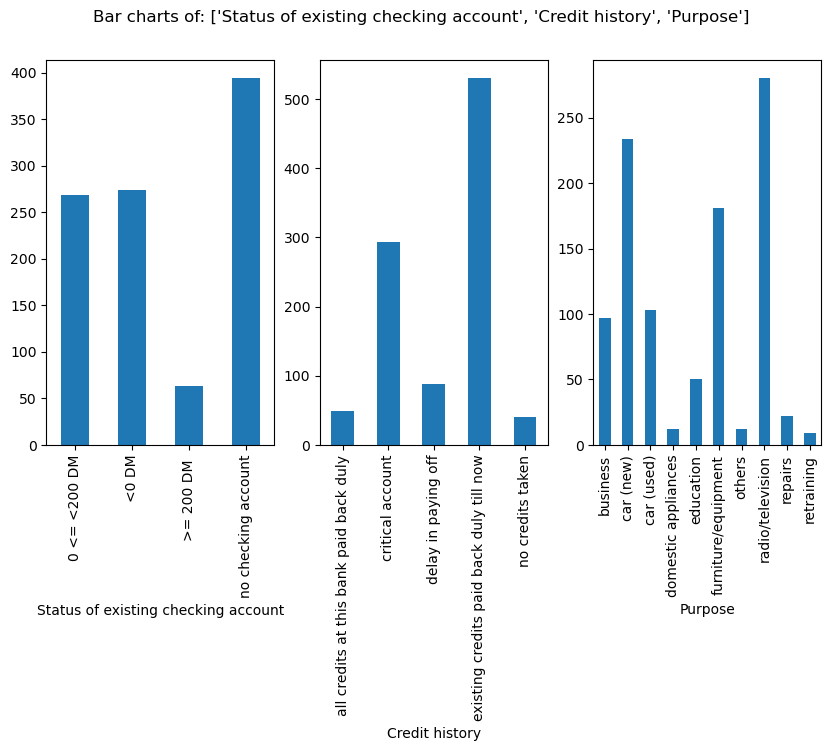

In [202]:
PlotBarCharts(inpData=df, 
              colsToPlot=['Status of existing checking account', 'Credit history', 'Purpose'])

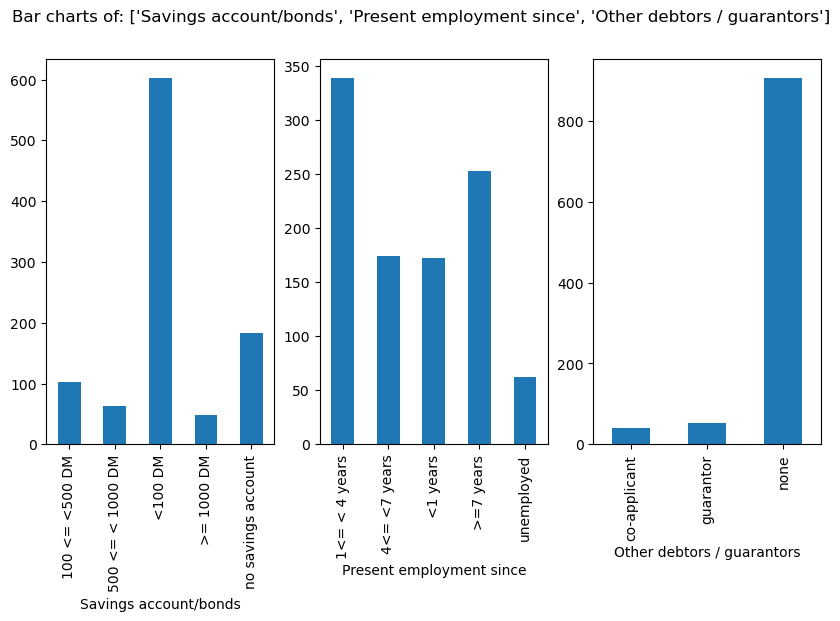

In [203]:
PlotBarCharts(inpData=df, 
              colsToPlot=['Savings account/bonds', 'Present employment since', 'Other debtors / guarantors'])

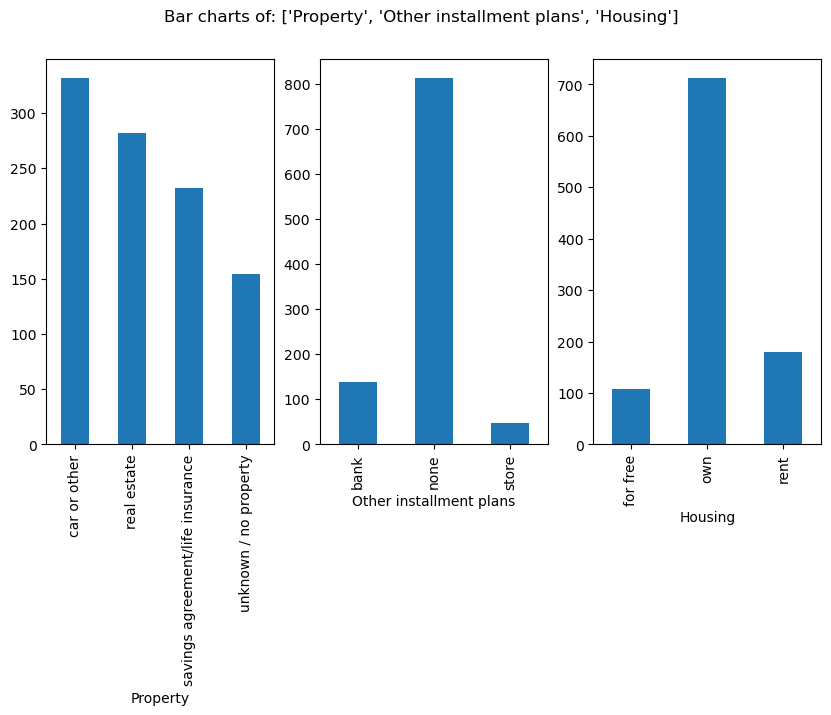

In [204]:
PlotBarCharts(inpData=df, 
              colsToPlot=['Property', 'Other installment plans', 'Housing'])

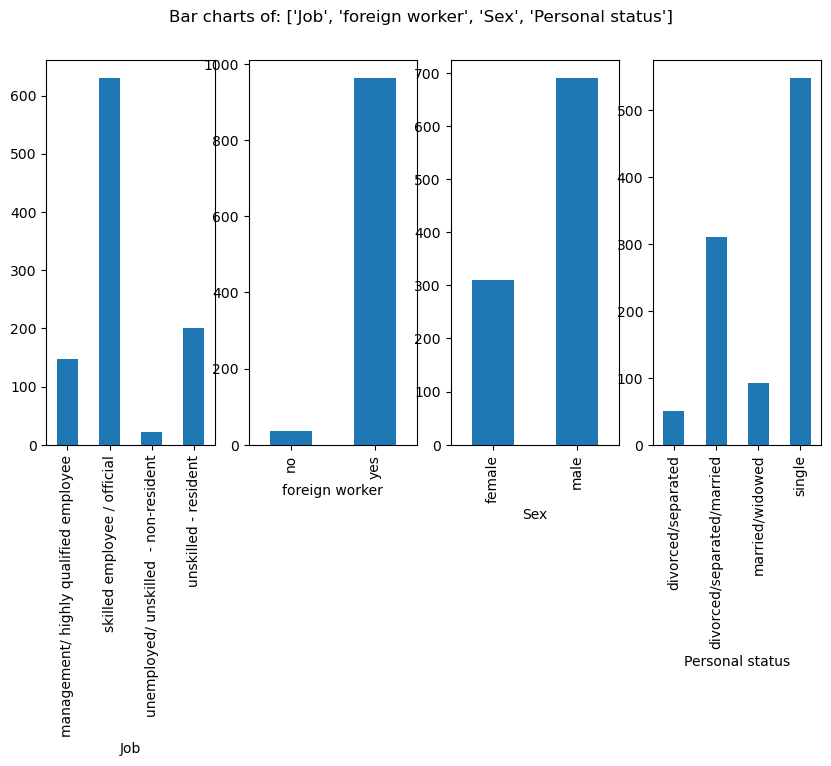

In [205]:
PlotBarCharts(inpData=df, 
              colsToPlot=['Job', 'foreign worker', 'Sex','Personal status'])

## Distributions of the numerical variables

C:\Users\Guest123\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


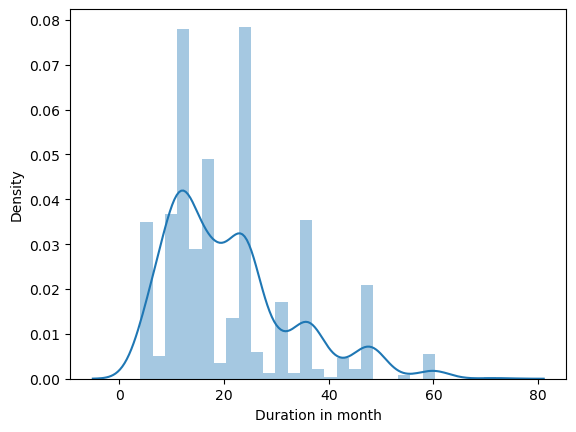

In [206]:
sns.distplot(df['Duration in month'])
plt.show()

C:\Users\Guest123\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


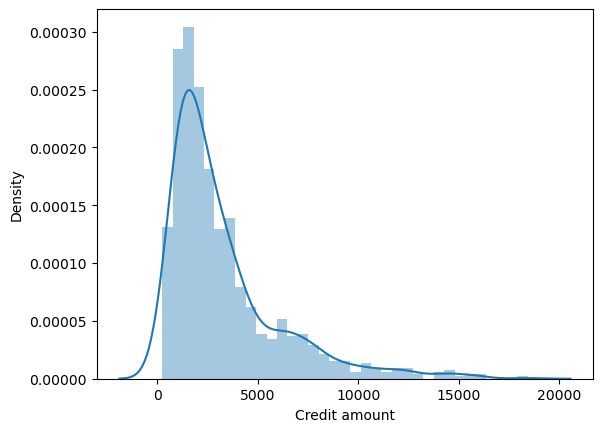

In [207]:
sns.distplot(df['Credit amount'])
plt.show()

C:\Users\Guest123\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


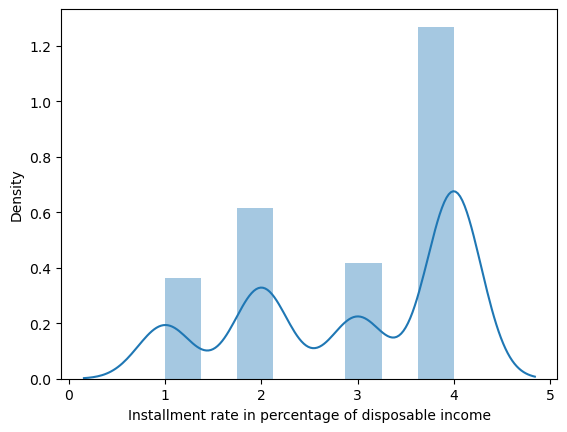

In [208]:
sns.distplot(df['Installment rate in percentage of disposable income'])
plt.show()

C:\Users\Guest123\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


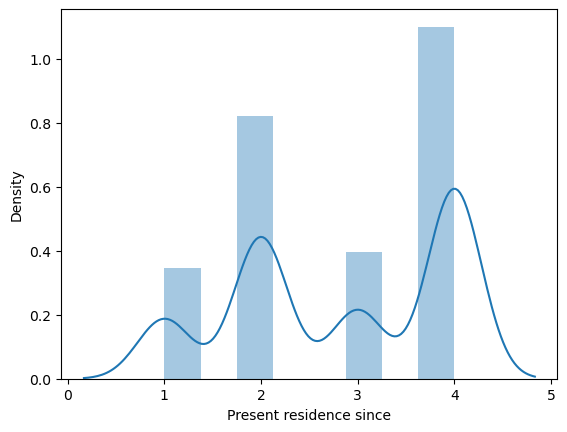

In [209]:
sns.distplot(df['Present residence since'])
plt.show()

C:\Users\Guest123\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


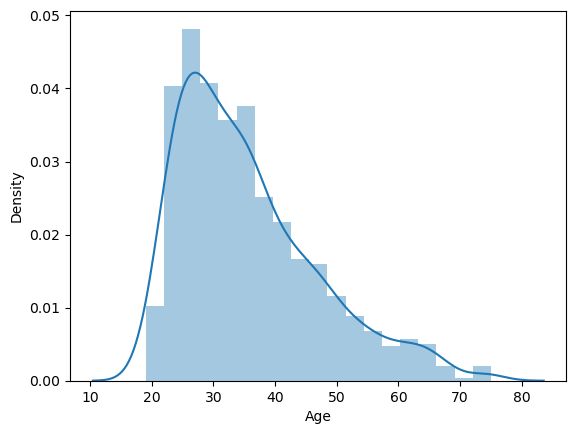

In [210]:
sns.distplot(df['Age'])
plt.show()

C:\Users\Guest123\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


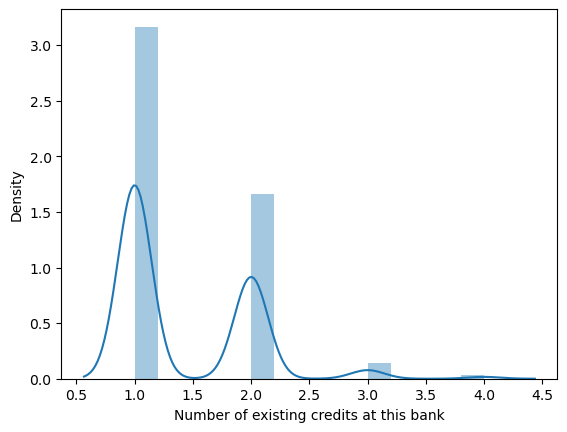

In [211]:
sns.distplot(df['Number of existing credits at this bank'])
plt.show()

C:\Users\Guest123\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


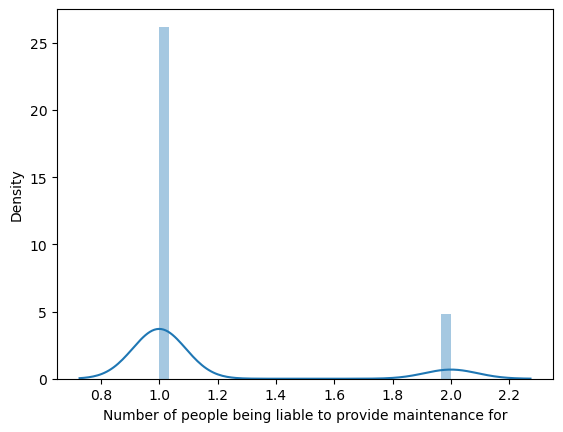

In [212]:
sns.distplot(df['Number of people being liable to provide maintenance for'])
plt.show()

C:\Users\Guest123\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


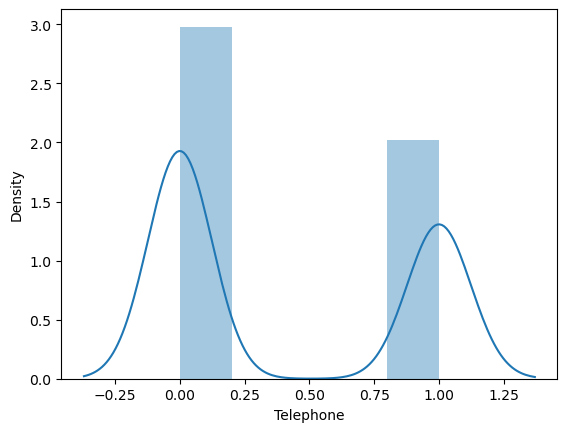

In [213]:
sns.distplot(df['Telephone'])
plt.show()

C:\Users\Guest123\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


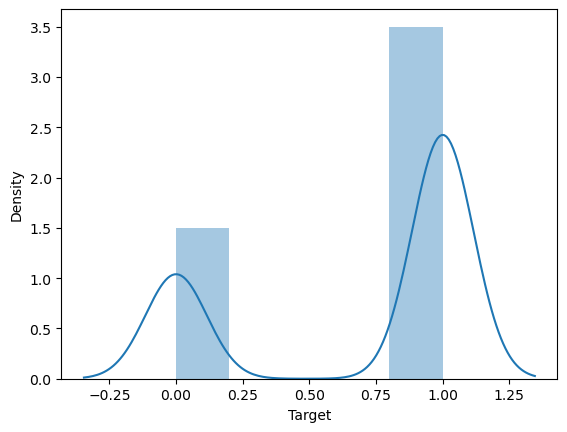

In [214]:
sns.distplot(df['Target'])
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Credit amount'}>],
       [<AxesSubplot:title={'center':'Duration in month'}>,
        <AxesSubplot:>]], dtype=object)

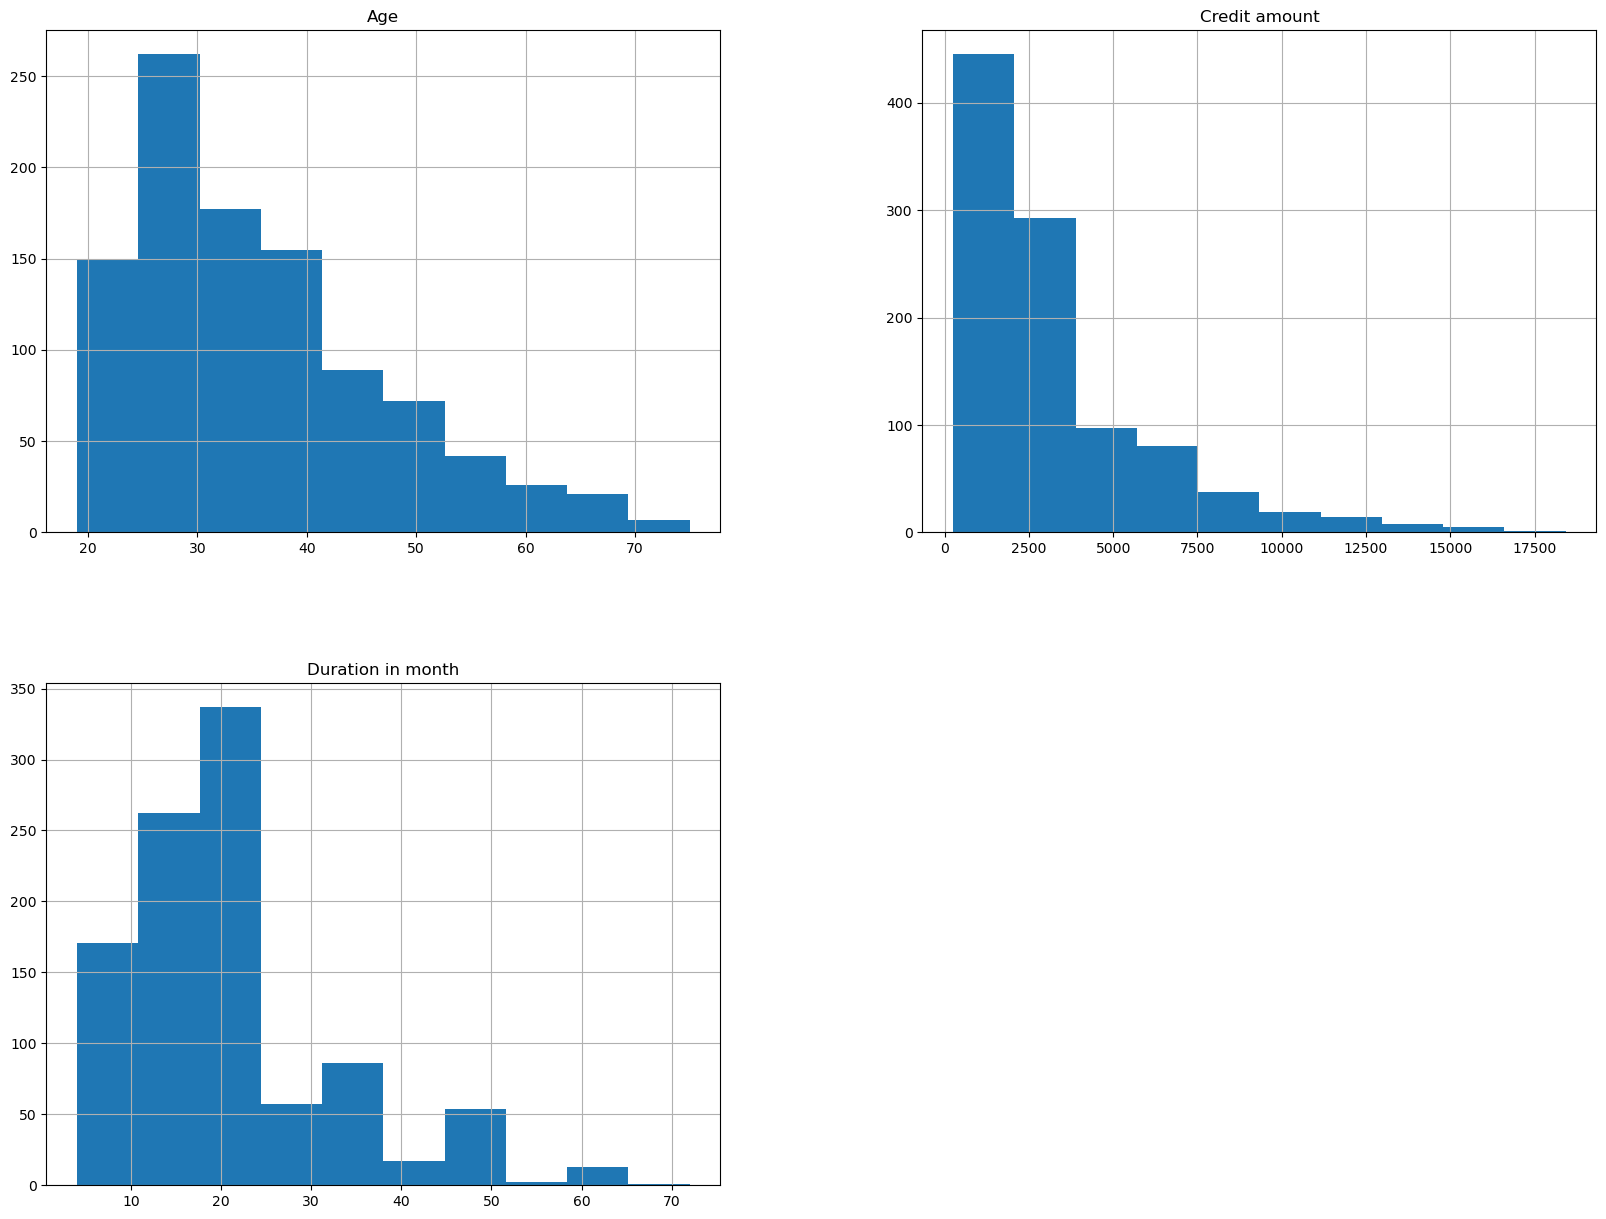

In [215]:
df.hist(['Age', 'Credit amount','Duration in month'], figsize=(20,15))

##  Target

Text(0.5, 1.0, 'Percentage of good and bad loans')

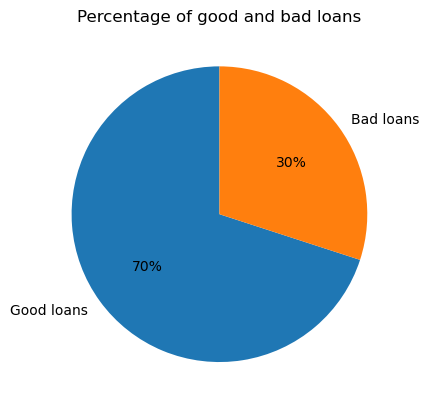

In [216]:
good_bad=round(((df.Target.value_counts()/df.Target.count())*100))
good_bad
plt.pie(good_bad,labels=['Good loans', 'Bad loans'], autopct='%1.0f%%', startangle=90)
plt.title('Percentage of good and bad loans')

In [217]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Status of existing checking account     4
Credit history                          5
Purpose                                10
Savings account/bonds                   5
Present employment since                5
Other debtors / guarantors              3
Property                                4
Other installment plans                 3
Housing                                 3
Job                                     4
foreign worker                          2
Sex                                     2
Personal status                         4
dtype: int64

In [218]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0
for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('%d columns label encoded.' % le_count)

2 columns label encoded.


In [219]:
df = pd.get_dummies(df)
print('Encoded Features shape: ', df.shape)

Encoded Features shape:  (1000, 61)


In [220]:
correlations = df.corr()['Target'].sort_values()
print(correlations.head(30))
print(correlations.tail(30))

Status of existing checking account_<0 DM                 -0.258333
Duration in month                                         -0.214927
Savings account/bonds_<100 DM                             -0.161007
Credit amount                                             -0.154739
Credit history_no credits taken                           -0.144767
Credit history_all credits at this bank paid back duly    -0.134448
Property_unknown / no property                            -0.125750
Status of existing checking account_0 <= <200 DM          -0.119581
Present employment since_<1 years                         -0.106397
Purpose_car (new)                                         -0.096900
Other installment plans_bank                              -0.096510
Housing_rent                                              -0.092785
foreign worker                                            -0.082079
Housing_for free                                          -0.081556
Personal status_divorced/separated/married      

## 

In [222]:
df=pd.read_csv('C://Users//Guest123//Desktop//NEU_Sem2_S23//INFO_6105_33201_DSEM//DSC_Assignment//german.data',sep=" ",header=None)
headers=["Status of existing checking account","Duration in month","Credit history",\
         "Purpose","Credit amount","Savings account/bonds","Present employment since",\
         "Installment rate in percentage of disposable income","Personal status and sex",\
         "Other debtors / guarantors","Present residence since","Property","Age",\
        "Other installment plans","Housing","Number of existing credits at this bank",\
        "Job","Number of people being liable to provide maintenance for","Telephone","foreign worker","Target"]
df.columns=headers

Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 DM", 'A12': "0 <= <200 DM",'A13':">= 200 DM "}
df["Status of existing checking account"]=df["Status of existing checking account"].map(Status_of_existing_checking_account)

Credit_history={"A34":"critical account","A33":"delay in paying off","A32":"existing credits paid back duly till now","A31":"all credits at this bank paid back duly","A30":"no credits taken"}
df["Credit history"]=df["Credit history"].map(Credit_history)

Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
df["Purpose"]=df["Purpose"].map(Purpose)

Saving_account={"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM","A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"}
df["Savings account/bonds"]=df["Savings account/bonds"].map(Saving_account)

Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
df["Present employment since"]=df["Present employment since"].map(Present_employment)

Personal_status_and_sex={ 'A95':"female:single",'A94':"male:married/widowed",'A93':"male:single", 'A92':"female:divorced/separated/married", 'A91':"male:divorced/separated"}
df["PS"]=df["Personal status and sex"].map(Personal_status_and_sex)

df[['Sex','Personal status']]=df.PS.str.split(':',expand=True)
df=df.drop(['PS','Personal status and sex'],1)

Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
df["Other debtors / guarantors"]=df["Other debtors / guarantors"].map(Other_debtors_guarantors)

Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["Property"]=df["Property"].map(Property)

Other_installment_plans={'A143':"none", 'A142':"store", 'A141':"bank"}
df["Other installment plans"]=df["Other installment plans"].map(Other_installment_plans)

Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["Housing"]=df["Housing"].map(Housing)

Job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
df["Job"]=df["Job"].map(Job)

Telephone={'A192':1, 'A191':0}
df["Telephone"]=df["Telephone"].map(Telephone)

foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign worker"]=df["foreign worker"].map(foreign_worker)

risk={1:1, 2:0}
df["Target"]=df["Target"].map(risk)


C:\Users\Guest123\AppData\Local\Temp\ipykernel_21492\2948156319.py:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(['PS','Personal status and sex'],1)


In [224]:
df = pd.DataFrame(df)
df['Status of existing checking account'] =df['Status of existing checking account'].astype('category').cat.codes
df['Credit history'] =df['Credit history'].astype('category').cat.codes
df['Purpose'] =df['Purpose'].astype('category').cat.codes
df['Savings account/bonds'] =df['Savings account/bonds'].astype('category').cat.codes
df['Present employment since'] =df['Present employment since'].astype('category').cat.codes
df['Other debtors / guarantors'] =df['Other debtors / guarantors'].astype('category').cat.codes
df['Property'] =df['Property'].astype('category').cat.codes
df['Other installment plans'] =df['Other installment plans'].astype('category').cat.codes
df['Housing'] =df['Housing'].astype('category').cat.codes
df['Job'] =df['Job'].astype('category').cat.codes
df['foreign worker'] =df['foreign worker'].astype('category').cat.codes
df['Sex'] =df['Sex'].astype('category').cat.codes
df['Personal status'] =df['Personal status'].astype('category').cat.codes

In [227]:
df[df.columns[1:]].corr()['Target'][:]

Duration in month                                          -0.214927
Credit history                                             -0.097054
Purpose                                                     0.089096
Credit amount                                              -0.154739
Savings account/bonds                                       0.103133
Present employment since                                   -0.008932
Installment rate in percentage of disposable income        -0.072404
Other debtors / guarantors                                  0.028441
Present residence since                                    -0.002967
Property                                                   -0.083097
Age                                                         0.091127
Other installment plans                                     0.053862
Housing                                                    -0.019315
Number of existing credits at this bank                     0.045732
Job                               

In [228]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

In [229]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0
for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('%d columns were label encoded.' % le_count)

0 columns were label encoded.


In [230]:
df = pd.get_dummies(df)
print('Encoded Features shape: ', df.shape)

Encoded Features shape:  (1000, 22)


# Selecting Features

In [232]:
TabResult=pd.crosstab(index=df['Status of existing checking account'], columns=df['Target'])
TabResult

Target,0,1
Status of existing checking account,,
0,105,164
1,135,139
2,14,49
3,46,348


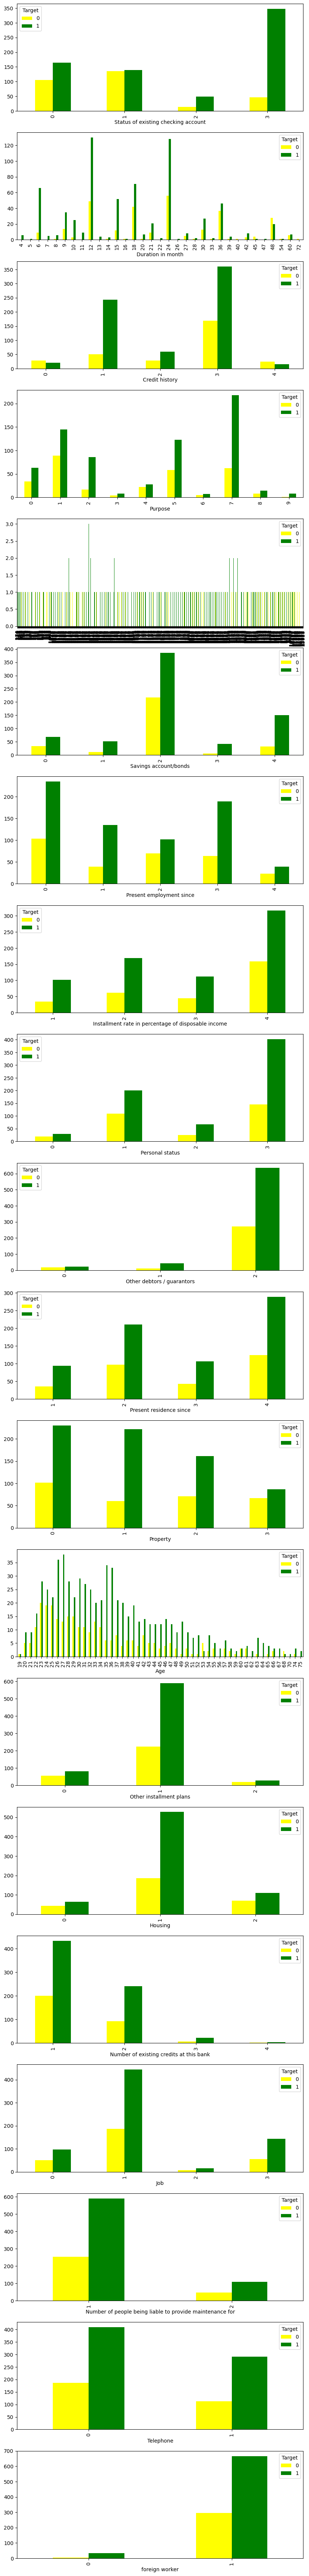

In [233]:
CategoricalColsList=['Status of existing checking account','Duration in month','Credit history','Purpose','Credit amount','Savings account/bonds','Present employment since','Installment rate in percentage of disposable income','Personal status','Other debtors / guarantors','Present residence since','Property','Age','Other installment plans','Housing','Number of existing credits at this bank','Job',
'Number of people being liable to provide maintenance for','Telephone','foreign worker']
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,90))
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    TabResult=pd.crosstab(index=df[CategoricalCol], columns=df['Target'])
    TabResult.plot.bar(color=['yellow','green'], ax=PlotCanvas[i])

## getting the p value

In [234]:
def Chisq(inpData, TargetVar, VariablesList):
    from scipy.stats import chi2_contingency
    SelectedPredictors=[]
    for predictor in VariablesList:
        TabResult=pd.crosstab(index=inpData[TargetVar], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVar, '| p-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVar, '| p-Value:', ChiSqResult[1])        
    return(0)

In [235]:
Variables=['Status of existing checking account','Credit history','Purpose','Savings account/bonds','Present employment since','Installment rate in percentage of disposable income','Personal status','Other debtors / guarantors','Present residence since','Property','Other installment plans','Housing','Number of existing credits at this bank','Job',
'Number of people being liable to provide maintenance for','Telephone','foreign worker']
Chisq(inpData=df, TargetVar='Target', VariablesList= Variables)

Status of existing checking account is correlated with Target | p-Value: 0.015830754902852885
Credit history is correlated with Target | p-Value: 0.015830754902852885
Purpose is correlated with Target | p-Value: 0.015830754902852885
Savings account/bonds is correlated with Target | p-Value: 0.015830754902852885
Present employment since is correlated with Target | p-Value: 0.015830754902852885
Installment rate in percentage of disposable income is correlated with Target | p-Value: 0.015830754902852885
Personal status is correlated with Target | p-Value: 0.015830754902852885
Other debtors / guarantors is correlated with Target | p-Value: 0.015830754902852885
Present residence since is correlated with Target | p-Value: 0.015830754902852885
Property is correlated with Target | p-Value: 0.015830754902852885
Other installment plans is correlated with Target | p-Value: 0.015830754902852885
Housing is correlated with Target | p-Value: 0.015830754902852885
Number of existing credits at this ban

0

In [236]:
'Status of existing checking account','Credit history', 'Purpose','Savings account/bonds','Present employment since','Personal status','Other debtors / guarantors','Property','Age','Other installment plans','Housing','Credit amount','foreign worker','Duration in month'

('Status of existing checking account',
 'Credit history',
 'Purpose',
 'Savings account/bonds',
 'Present employment since',
 'Personal status',
 'Other debtors / guarantors',
 'Property',
 'Age',
 'Other installment plans',
 'Housing',
 'Credit amount',
 'foreign worker',
 'Duration in month')

In [237]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Other debtors / guarantors,Present residence since,...,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Target,Sex,Personal status
0,1,6,1,7,1169,4,3,4,2,4,...,1,1,2,1,1,1,1,1,1,3
1,0,48,3,7,5951,2,0,2,2,2,...,1,1,1,1,1,0,1,0,0,1
2,3,12,1,4,2096,2,1,2,2,3,...,1,1,1,3,2,0,1,1,1,3
3,1,42,3,5,7882,2,1,2,1,4,...,1,0,1,1,2,0,1,1,1,3
4,1,24,2,1,4870,2,0,3,2,4,...,1,0,2,1,2,0,1,0,1,3
